In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Import necessary libraries
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set path to your root directory
path = Path('/content/drive/My Drive/Colab Notebooks/chest_xray')
path.ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/ChestX-ray_Fastaiv1_Imgclassifier.ipynb'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/.DS_Store'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/test'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/val'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/train'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/chest_xray/models')]

In [4]:
# We are creating a fastai DataBunch from our dataset
# The transformers are already built into the model
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

['NORMAL', 'PNEUMONIA'] 2
5232 625


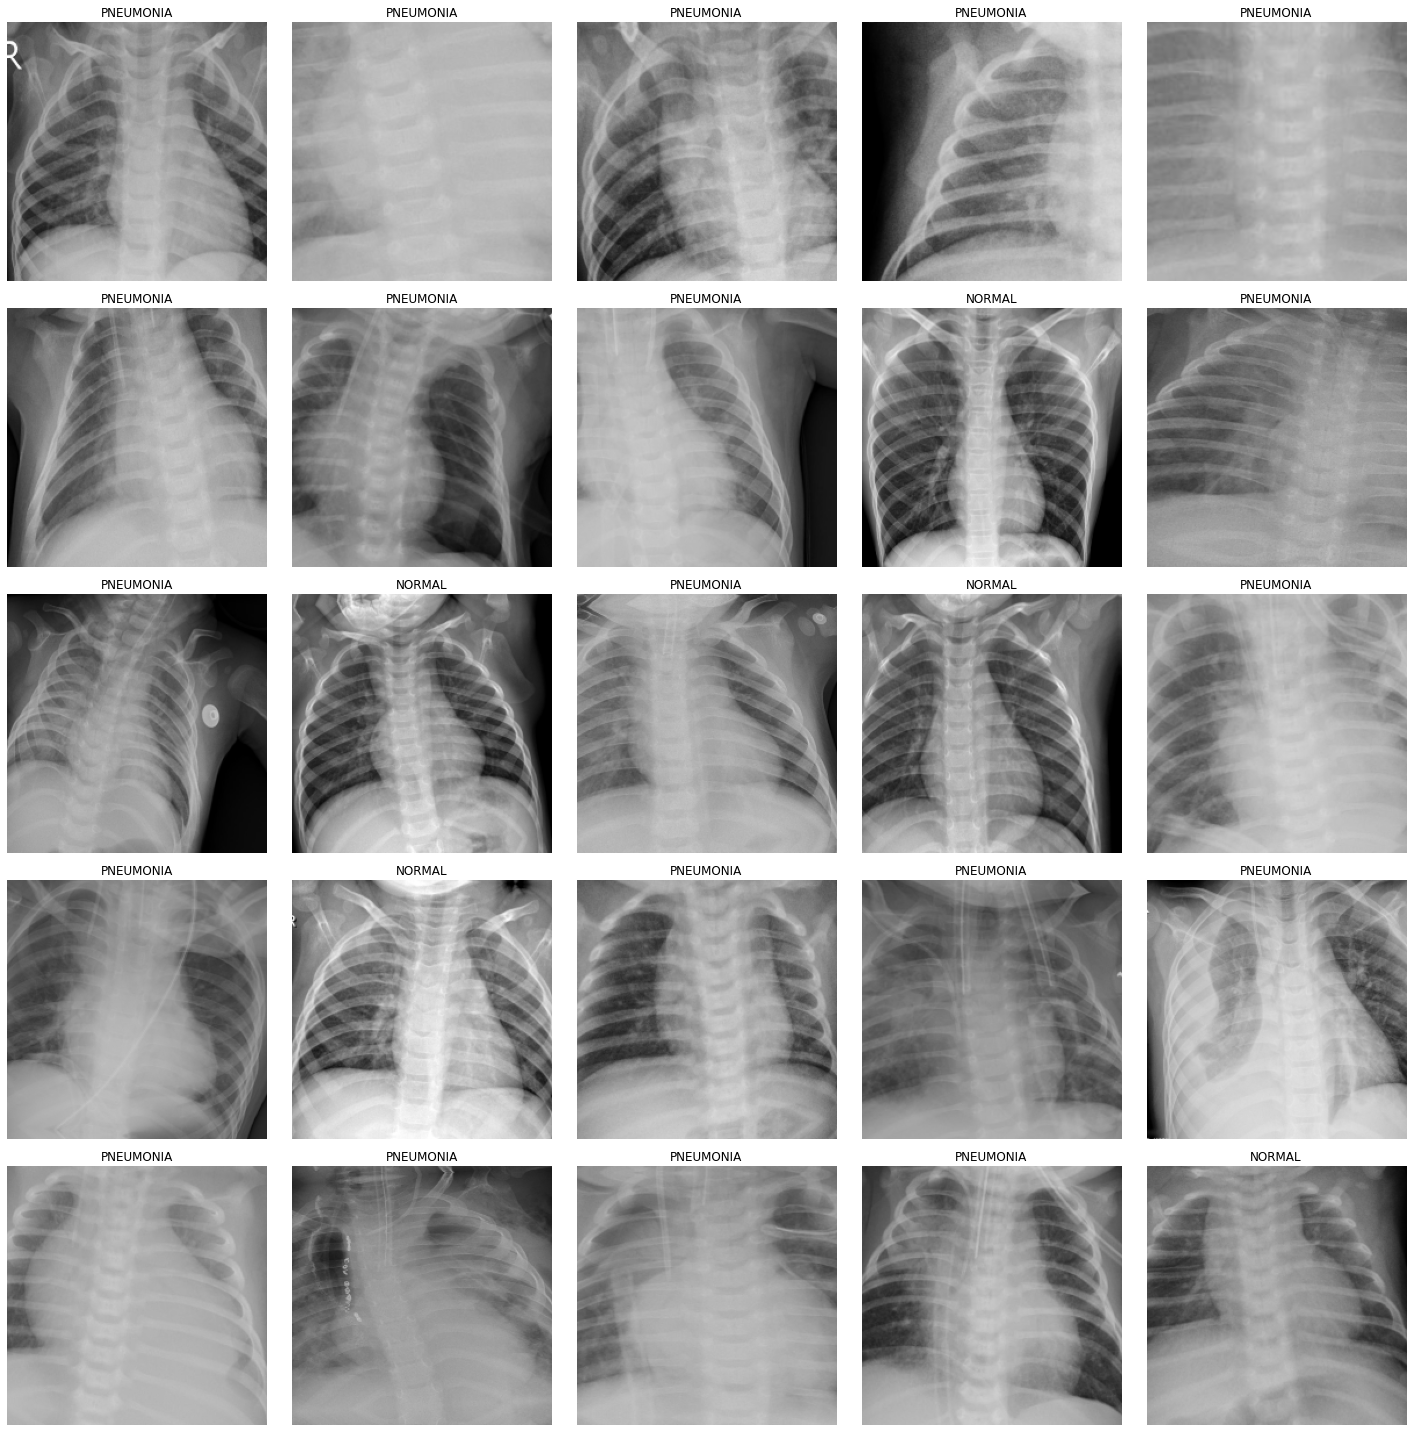

In [5]:
# Show what the data looks like after being transformed
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
print(len(data.train_ds), len(data.valid_ds))

In [6]:
# Build the CNN model with the pretrained resnet34
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

In [7]:
# Train the model on 4 epochs of data at the default learning rate
# Ignore error rate/valid loss data here, decreasing train loss is all that matters
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.441576,0.842370,0.761600,03:37
1,0.258712,0.318595,0.897600,03:38
2,0.176985,0.342042,0.892800,03:38
3,0.137408,0.341935,0.876800,03:44


In [8]:
# Save the model
learn.save('stag#e-1')

# Load the Model
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5232 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /content/drive/My Drive/Colab Notebooks/chest_xray;

Valid: LabelList (625 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: /content/drive/My Drive/Colab Notebooks/chest_xray;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [9]:
# Build a Classification Interpretation object from our learn model
interp = ClassificationInterpretation.from_learner(learn)

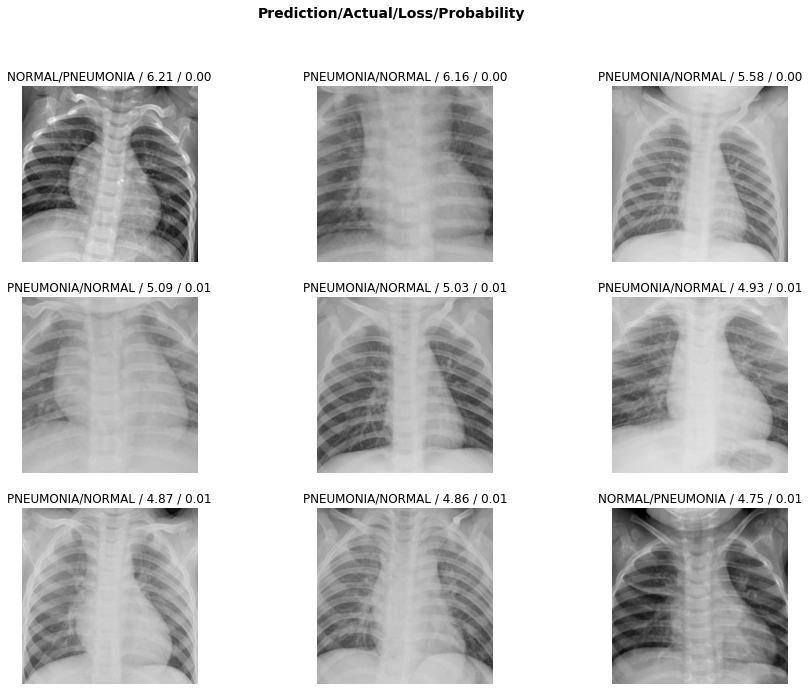

In [10]:
# Show top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

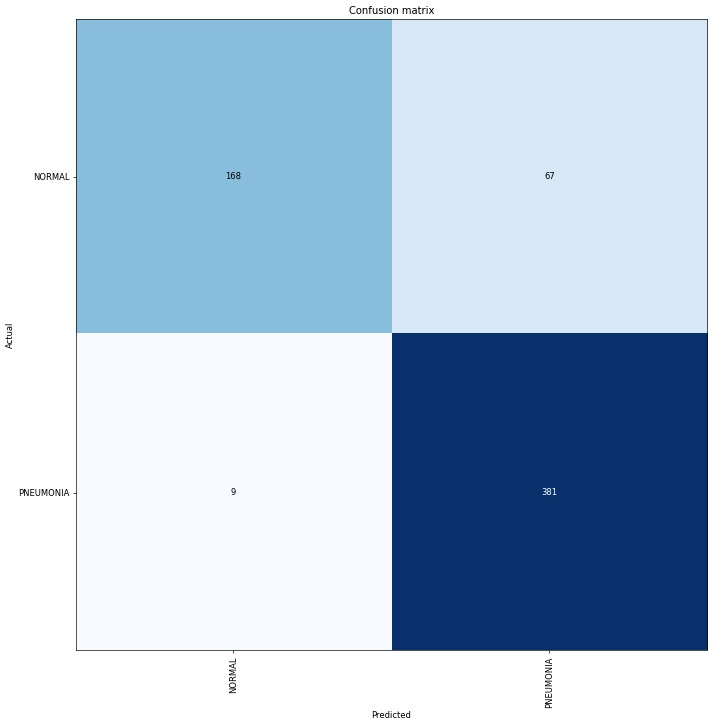

In [11]:
# Build a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [12]:
# Build a text version of a confusion matrix-- really helpful with a lot of classes
interp.most_confused(min_val=2)

[('NORMAL', 'PNEUMONIA', 67), ('PNEUMONIA', 'NORMAL', 9)]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 1.58E-07


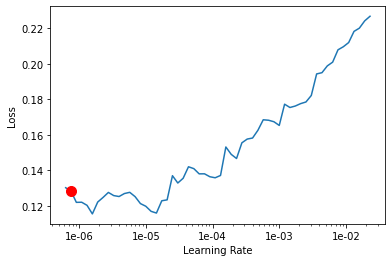

In [13]:
# Unfreeze all layers of the CNN
learn.unfreeze()

# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [16]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.136373,0.331458,0.888000,03:44
1,0.135026,0.313250,0.891200,03:48


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.75E-07


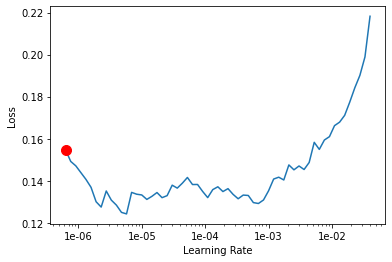

In [17]:
# See if optimal learning rate changes
learn.lr_find()
learn.recorder.plot(suggestion=True)Let

In [18]:
# Fit the model 2 more epochs over all the layers
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.139913,0.309036,0.905600,03:45
1,0.091900,0.227244,0.915200,03:51


In [19]:
# Save the model
learn.save('stage-2')

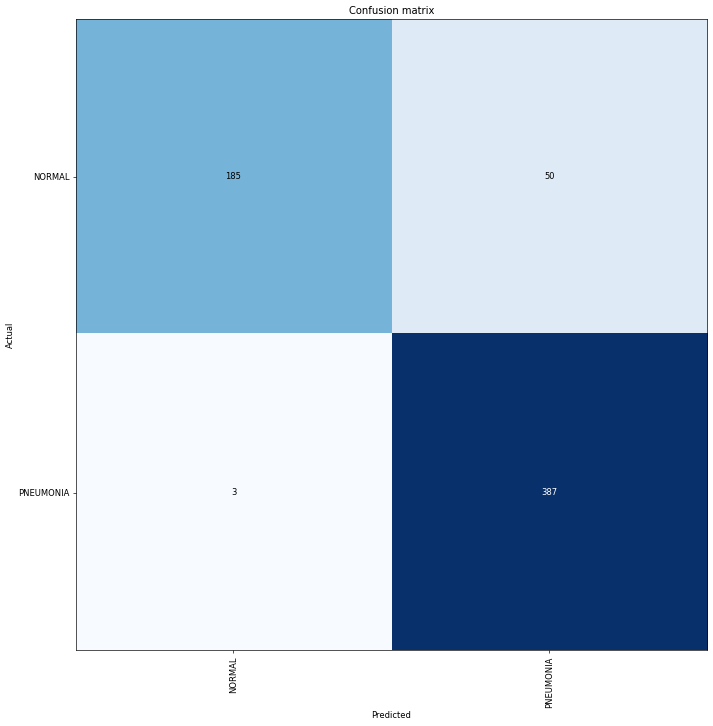

In [20]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
# Save final stage of model
learn.save('stage-2')

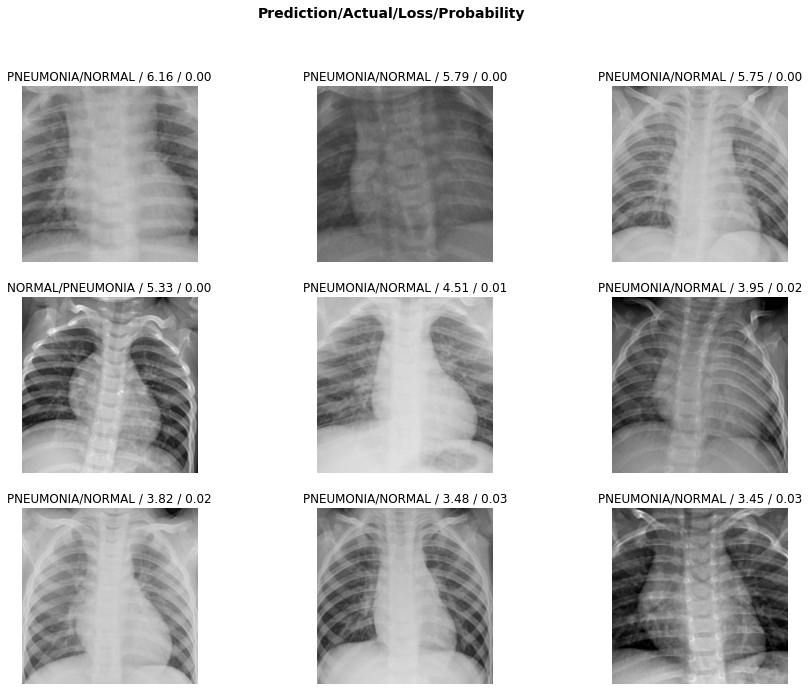

In [22]:
# Show top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

In [23]:
# Build a text version of a confusion matrix-- really helpful with a lot of classes
interp.most_confused(min_val=2)

[('NORMAL', 'PNEUMONIA', 50), ('PNEUMONIA', 'NORMAL', 3)]